# DEF-D Fysieke Ontwerpopdracht 1 invul template

## Groepsgegevens en planning 

Aan het einde van deze ontwerpopdracht lever je als groep dit notebook gezamenlijk in via een pull request op Github en lever je een link naar dit pull request in op Brightspace. Zet jullie studienummers en namen in onderstaande tabel zodat wij zeker weten dat het groepsvormen goed is gegaan. Werk in de juiste branch.

| Groep: 52     |  |
| :-------------|:-------------|
| Koen Gort |6574963 |
| Tije Kijlstra | 6448003 |
| Justin Sloots | 6541313 |

| Planning Groep: 52     |Tijdstip / Tijdspanne  |
|---|---|
| Mijlpaal 1: Criteria opgesteld | 11:30 |
| Mijlpaal 2: Eerste kalibratie meting gedaan| 15:00 |
| Pauze 1| 12:45-13:45 |
| Pauze 2| 16:00-16:15 |

## *Opdracht 1*: Foto van alle schetsen.

Zet de foto in dezelfde map als dit notebook en verander hieronder de naam in de naam van de foto.

![Alt](Foto_schetsen_ideeen.jpeg "analyse: ideeen")

## *Opdracht 2*, MIJLPAAL, Leerdoel
Vul onderstaande tabel in en geef aan met welke sensor je verder gaat.** Laat dit aan je TA zien.** Als je TA druk is: ga wel ondertussen door met de volgende stap.

| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|LDR | Automatisch licht dat aangaat wanneer het buiten donker is. | 1. Moet kunnen meten wanneer het tussen de 1 en de 500 lux is. 2. moet voor een 5 minuten deze lagere waarde meten voordat het licht aangaat. 3. nauwkeurigheid van 1 lux. |
|LDR | Automatische zonnewering | Criteria omschrijving |
|LDR | Kijken of klaslokalen goed belicht zijn | Criteria omschrijving |
|Thermistor | Thermostaat die automatisch aan gaat | Criteria omschrijving |
|Thermistor | Oververhitting in telefoons opmerken | 1. Moet temperaturen kunnen meten tussen 30 en 60 graden celsius. 2. moet verschillen van halve graden kunnen meten. |
|Thermistor | Automatisch de ramen open als het te warm wordt | Criteria omschrijving |
|Krachtsensor | een fruitweegschaal | 1. De meetbare waardes moeten tussen 0 en 1 kg liggen. 2. Nauwkeurigheid van 10 gram. |
|Krachtsensor | drukgevoelige knoppen | Criteria omschrijving |
|Krachtsensor | meten hoe hard je je laptop dicht doet. | Criteria omschrijving |

Groep 52 heeft gekozen voor sensor Krachtsensor. 

## *Opdracht 3*: Foto van de schets van jouw meetopstelling in.
De schakeling die we gebruiken om de krachtmeter te kalibreren. De schakeling waar "Krachtmeter" naast staat is om de krachtmeter uit te lezen, de schakeling waar "Knop" naast staat is voor de knop om de meting te doen.
 ![Alt](Schets_Circuit_Opdracht1.jpeg "schets student")

## *Opdracht 4*: Beantwoord de vragen

1. Welke variabelen ga je veranderen? Het gewicht wat op de sensor staat.
2. Over welk bereik ga je deze variabelen veranderen? Tussen de 0 gram en 1 kg.
3. Wat ga je allemaal meten? De gegeven waarde van de arduino (bits) bij een bepaald gewicht.
4. Hoeveel metingen ga je doen? 10 Metingen
5. Ga je met deze keuzes kunnen evalueren of jouw sensor geschikt is voor de gekozen toepassingen? Ja, want dan kunnen we interpoleren wat de maximaal meetbare waarde is.


## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
De arduino en de schakeling zijn hier te zien met een fles op de krachtmeter.
 ![Alt](OpstellingOpdracht1.jpeg "meetopstelling student")

## *Opdracht 6*: Meten en fitten, Leerdoel

In [54]:
# Zet hier jouw data in een voor jou handig formaat
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#, (0.48126+0.09286), (0.59907+0.09286) massa
#, (945), (934) bits
massa = np.array([0, 0.09286, 0.5677+0.09286, 0.8751+0.09286, 0.5045+0.09286, 0.7862+0.09286, 0.7285+0.09286, 0.4246+0.09286, 0.6744+ 0.09286, 0.0098+ 0.09286])*1000  #massa van gewichten in gram
bits_raw = np.array([1023, 997, 928, 885, 931, 895, 903, 939, 912, 993])  #gegeven waarde door de arduino in bits

[ 0.258006   24.24021066]


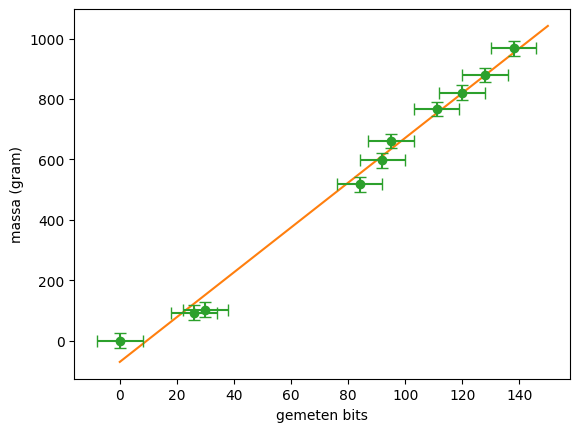

In [67]:
# Plot hier de meting en fit een lijn door de metingen.
# Maak gebruik van wat je geleerd hebt bij het practicum.

bits_omgerekend = 1023 - bits_raw # omrekenen zodat de waarde nu van 0 tot 1023 i.p.v. van 1023 tot 0

def verhouding(x,a,b):
    return a*x+b

# Bereken residuen
residuen = massa - verhouding(bits_omgerekend, *pvar)

# Schatting van standaardafwijking (reduced chi^2 benadering)
N = len(massa)
p = len(pvar)  # aantal fitparameters
sigma_y = np.sqrt(np.sum(residuen**2) / (N - p))

# Maak array met gelijke fout voor alle punten
# y_err = np.ones_like(massa) * sigma_y

pvar, pcov= curve_fit(verhouding, bits_omgerekend, massa)
x_fit = np.linspace(0,150, 151)
gefit = verhouding(x_fit, pvar[0], pvar[1])

y_err = np.sqrt(np.diag(pcov))
print(y_err)

plt.figure()
plt.plot(bits_omgerekend, massa, ".")
plt.plot(x_fit, gefit)
plt.errorbar(bits_omgerekend, massa, yerr=y_err[1], xerr=8, fmt='o', capsize=4)
plt.xlabel("gemeten bits")
plt.ylabel("massa (gram)")
plt.show()


## *Opdracht 7*: Iteratie nodig?

Iteraties waren niet nodig.

## *Opdracht 8*: Conclusie, leerdoel

Deze krachtmeter kan niet als een fruitweegschaal werken angezien de meetonzekerheid groter is dan 10 gram, dus voldoet dit niet aan onze criteria. 

## *Opdracht 9*: Aantonen leerdoelen beheersing

Om aan te tonen dat je de leerdoelen beheerst, kopieer je hieronder alle cellen met 'leerdoel' in de titel. Zet zelf de cellen onder de goede kopjes. Mogelijk komt een cel bij meerdere leerdoelen terug.

### Leerdoel 1: Simpele circuits (RC-circuit, spanningsdelers met sensoren) ontwerpen en fabriceren.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 1 beheersen.

## *Opdracht 3*: Foto van de schets van jouw meetopstelling in.
De schakeling die we gebruiken om de krachtmeter te kalibreren. De schakeling waar "Krachtmeter" naast staat is om de krachtmeter uit te lezen, de schakeling waar "Knop" naast staat is voor de knop om de meting te doen.
 ![Alt](Schets_Circuit_Opdracht1.jpeg "schets student")

## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
De arduino en de schakeling zijn hier te zien met een fles op de krachtmeter.
 ![Alt](OpstellingOpdracht1.jpeg "meetopstelling student")

### Leerdoel 2: Ontwerpeisen voor een opdracht SMART opstellen en vervolgens de ontwerpcyclus inrichten, rekening houdend met de randvoorwaarde van de opdracht.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 2 beheersen.

## *Opdracht 1*: Foto van alle schetsen.

Zet de foto in dezelfde map als dit notebook en verander hieronder de naam in de naam van de foto.

![Alt](Foto_schetsen_ideeen.jpeg "analyse: ideeen")

## *Opdracht 2*, MIJLPAAL, Leerdoel
Vul onderstaande tabel in en geef aan met welke sensor je verder gaat.** Laat dit aan je TA zien.** Als je TA druk is: ga wel ondertussen door met de volgende stap.

| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|LDR | Automatisch licht dat aangaat wanneer het buiten donker is. | 1. Moet kunnen meten wanneer het tussen de 1 en de 500 lux is. 2. moet voor een 5 minuten deze lagere waarde meten voordat het licht aangaat. 3. nauwkeurigheid van 1 lux. |
|LDR | Automatische zonnewering | Criteria omschrijving |
|LDR | Kijken of klaslokalen goed belicht zijn | Criteria omschrijving |
|Thermistor | Thermostaat die automatisch aan gaat | Criteria omschrijving |
|Thermistor | Oververhitting in telefoons opmerken | 1. Moet temperaturen kunnen meten tussen 30 en 60 graden celsius. 2. moet verschillen van halve graden kunnen meten. |
|Thermistor | Automatisch de ramen open als het te warm wordt | Criteria omschrijving |
|Krachtsensor | een kleine weegschaal | 1. De meetbare waardes moeten tussen 0 en 1 kg liggen. 2. Nauwkeurigheid van 10 gram. |
|Krachtsensor | drukgevoelige knoppen | Criteria omschrijving |
|Krachtsensor | meten hoe hard je je laptop dicht doet. | Criteria omschrijving |

Groep 52 heeft gekozen voor sensor Krachtsensor. 

## *Opdracht 4*: Beantwoord de vragen

1. Welke variabelen ga je veranderen? Het gewicht wat op de sensor staat.
2. Over welk bereik ga je deze variabelen veranderen? Tussen de 0 gram en 1 kg.
3. Wat ga je allemaal meten? De gegeven waarde van de arduino (bits) bij een bepaald gewicht.
4. Hoeveel metingen ga je doen? 10 Metingen
5. Ga je met deze keuzes kunnen evalueren of jouw sensor geschikt is voor de gekozen toepassingen? Ja, want dan kunnen we interpoleren wat de maximaal meetbare waarde is.


### Leerdoel 3: Voor een gegeven sensor & analoog-digitaal convertor en gegeven (of zelf gekozen) toepassing een kalibratie meting ontwerpen, inclusief het circuit om de sensor aan te sluiten op de analoog-digitaal convertor, de opstelling bouwen, en meetresultaten verwerken en concluderen of de combinatie van sensor en analoog-digitaal conversie geschikt is voor de toepassing.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 3 beheersen.

## *Opdracht 4*: Beantwoord de vragen

1. Welke variabelen ga je veranderen? Het gewicht wat op de sensor staat.
2. Over welk bereik ga je deze variabelen veranderen? Tussen de 0 gram en 1 kg.
3. Wat ga je allemaal meten? De gegeven waarde van de arduino (bits) bij een bepaald gewicht.
4. Hoeveel metingen ga je doen? 10 Metingen
5. Ga je met deze keuzes kunnen evalueren of jouw sensor geschikt is voor de gekozen toepassingen? Ja, want dan kunnen we interpoleren wat de maximaal meetbare waarde is.


## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
De arduino en de schakeling zijn hier te zien met een fles op de krachtmeter.
 ![Alt](OpstellingOpdracht1.jpeg "meetopstelling student")

In [ ]:
# Zet hier jouw data in een voor jou handig formaat
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#, (0.48126+0.09286), (0.59907+0.09286) massa
#, (945), (934) bits
massa = np.array([0, 0.09286, 0.5677+0.09286, 0.8751+0.09286, 0.5045+0.09286, 0.7862+0.09286, 0.7285+0.09286, 0.4246+0.09286, 0.6744+ 0.09286, 0.0098+ 0.09286])*1000  #massa van gewichten in gram
bits_raw = np.array([1023, 997, 928, 885, 931, 895, 903, 939, 912, 993])  #gegeven waarde door de arduino in bits

[ 0.258006   24.24021066]


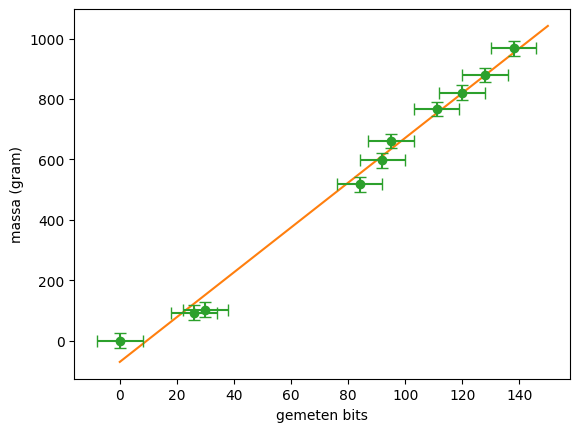

In [ ]:
# Plot hier de meting en fit een lijn door de metingen.
# Maak gebruik van wat je geleerd hebt bij het practicum.

bits_omgerekend = 1023 - bits_raw # omrekenen zodat de waarde nu van 0 tot 1023 i.p.v. van 1023 tot 0

def verhouding(x,a,b):
    return a*x+b

# Bereken residuen
residuen = massa - verhouding(bits_omgerekend, *pvar)

# Schatting van standaardafwijking (reduced chi^2 benadering)
N = len(massa)
p = len(pvar)  # aantal fitparameters
sigma_y = np.sqrt(np.sum(residuen**2) / (N - p))

# Maak array met gelijke fout voor alle punten
# y_err = np.ones_like(massa) * sigma_y

pvar, pcov= curve_fit(verhouding, bits_omgerekend, massa)
x_fit = np.linspace(0,150, 151)
gefit = verhouding(x_fit, pvar[0], pvar[1])

y_err = np.sqrt(np.diag(pcov))
print(y_err)

plt.figure()
plt.plot(bits_omgerekend, massa, ".")
plt.plot(x_fit, gefit)
plt.errorbar(bits_omgerekend, massa, yerr=y_err[1], xerr=8, fmt='o', capsize=4)
plt.xlabel("gemeten bits")
plt.ylabel("massa (gram)")
plt.show()


## *Opdracht 8*: Conclusie, leerdoel

Deze krachtmeter kan niet als een fruitweegschaal werken angezien de meetonzekerheid groter is dan 10 gram, dus voldoet dit niet aan onze criteria. 